<a href="https://colab.research.google.com/github/bipul-ranjan/Melanoma-Detection/blob/main/Bipul_ranjan_CNN_Skin_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [107]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [108]:
import pathlib
import os

import numpy as np
import pandas as pd
import PIL
import glob

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers  import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D,BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

### Data Reading/Data Understanding
Defining the path for train and test images

In [109]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
root_path = pathlib.Path('/content/drive/MyDrive/Data-For-Analysis/melanoma_CNN/ISIC_data')
data_dir_train = pathlib.Path("/content/drive/MyDrive/Data-For-Analysis/melanoma_CNN/ISIC_data/Train")
data_dir_test = pathlib.Path('/content/drive/MyDrive/Data-For-Analysis/melanoma_CNN/ISIC_data/Test')

print("Base directory path", root_path)
print("Train directory path", data_dir_train)
print("Test directory path", data_dir_test)

Base directory path /content/drive/MyDrive/Data-For-Analysis/melanoma_CNN/ISIC_data
Train directory path /content/drive/MyDrive/Data-For-Analysis/melanoma_CNN/ISIC_data/Train
Test directory path /content/drive/MyDrive/Data-For-Analysis/melanoma_CNN/ISIC_data/Test


 The details of directory and files in Train
There are 9 directories and 0 images in 'Train'.
There are 0 directories and 114 images in 'actinic keratosis'.
There are 0 directories and 376 images in 'basal cell carcinoma'.
There are 0 directories and 95 images in 'dermatofibroma'.
There are 0 directories and 438 images in 'melanoma'.
There are 0 directories and 357 images in 'nevus'.
There are 0 directories and 462 images in 'pigmented benign keratosis'.
There are 0 directories and 77 images in 'seborrheic keratosis'.
There are 0 directories and 181 images in 'squamous cell carcinoma'.
There are 0 directories and 139 images in 'vascular lesion'.
 
 The details of directory and files in Test
There are 9 directories and 0 images in 'Test'.
There are 0 directories and 16 images in 'actinic keratosis'.
There are 0 directories and 16 images in 'basal cell carcinoma'.
There are 0 directories and 16 images in 'dermatofibroma'.
There are 0 directories and 16 images in 'melanoma'.
There are 0 d

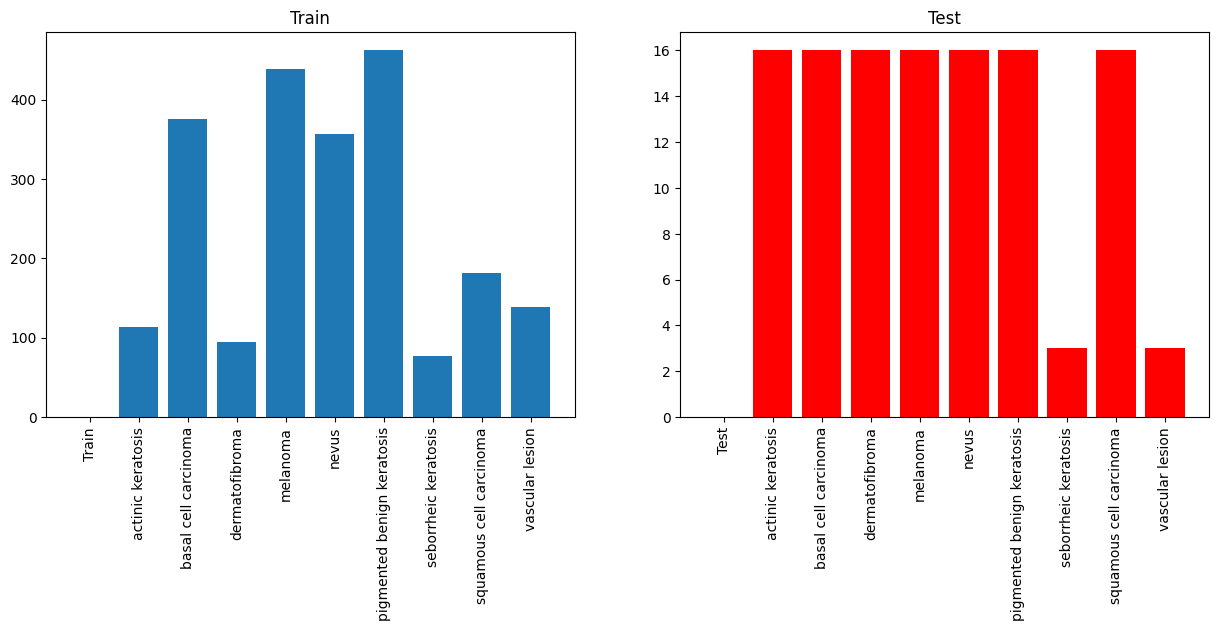

In [110]:
# Count number of files in each directories of train and test

print(" The details of directory and files in Train")
image_train_y = []
class_train_x = []
for dirpath, dirnames, filenames in os.walk(data_dir_train):
  image_train_y.append(len(filenames))
  class_train_x.append(os.path.basename(dirpath))
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{os.path.basename(dirpath)}'.")

image_test_y = []
class_test_x = []
print(" \n The details of directory and files in Test")
for dirpath, dirnames, filenames in os.walk(data_dir_test):
  image_test_y.append(len(filenames))
  class_test_x.append(os.path.basename(dirpath))
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{os.path.basename(dirpath)}'.")

fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].bar(class_train_x,image_train_y)
ax[0].tick_params(axis='x', rotation=90)
ax[0].set_title("Train")

ax[1].bar(class_test_x,image_test_y, color ='red')
ax[1].tick_params(axis='x', rotation=90)
ax[1].set_title("Test")
plt.show()


In [111]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print("# of images in train :",image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print("# of images in test:",image_count_test)

print ("Total # of images : ",image_count_train+image_count_test)

# of images in train : 2239
# of images in test: 118
Total # of images :  2357


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Dataset Creation

Create train & validation dataset from the train directory with a batch size of 32. Also, make sure you resize your images to 180*180.

In [112]:
batch_size = 32
img_height = 180
img_width = 180



Use 80% of the images for training, and 20% for validation.

In [113]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    validation_split=0.2,
    subset="training",
    seed=123,
    color_mode='rgb',
    shuffle=True,
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [114]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
     data_dir_train,
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    validation_split=0.2,
    subset="validation",
    seed=123,
    color_mode='rgb',
    shuffle=True,
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [115]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Dataset visualisation
Create a code to visualize one instance of all the nine classes present in the dataset

Image_batch.shape : (32, 180, 180, 3)
label_batch.shape : (32, 9)


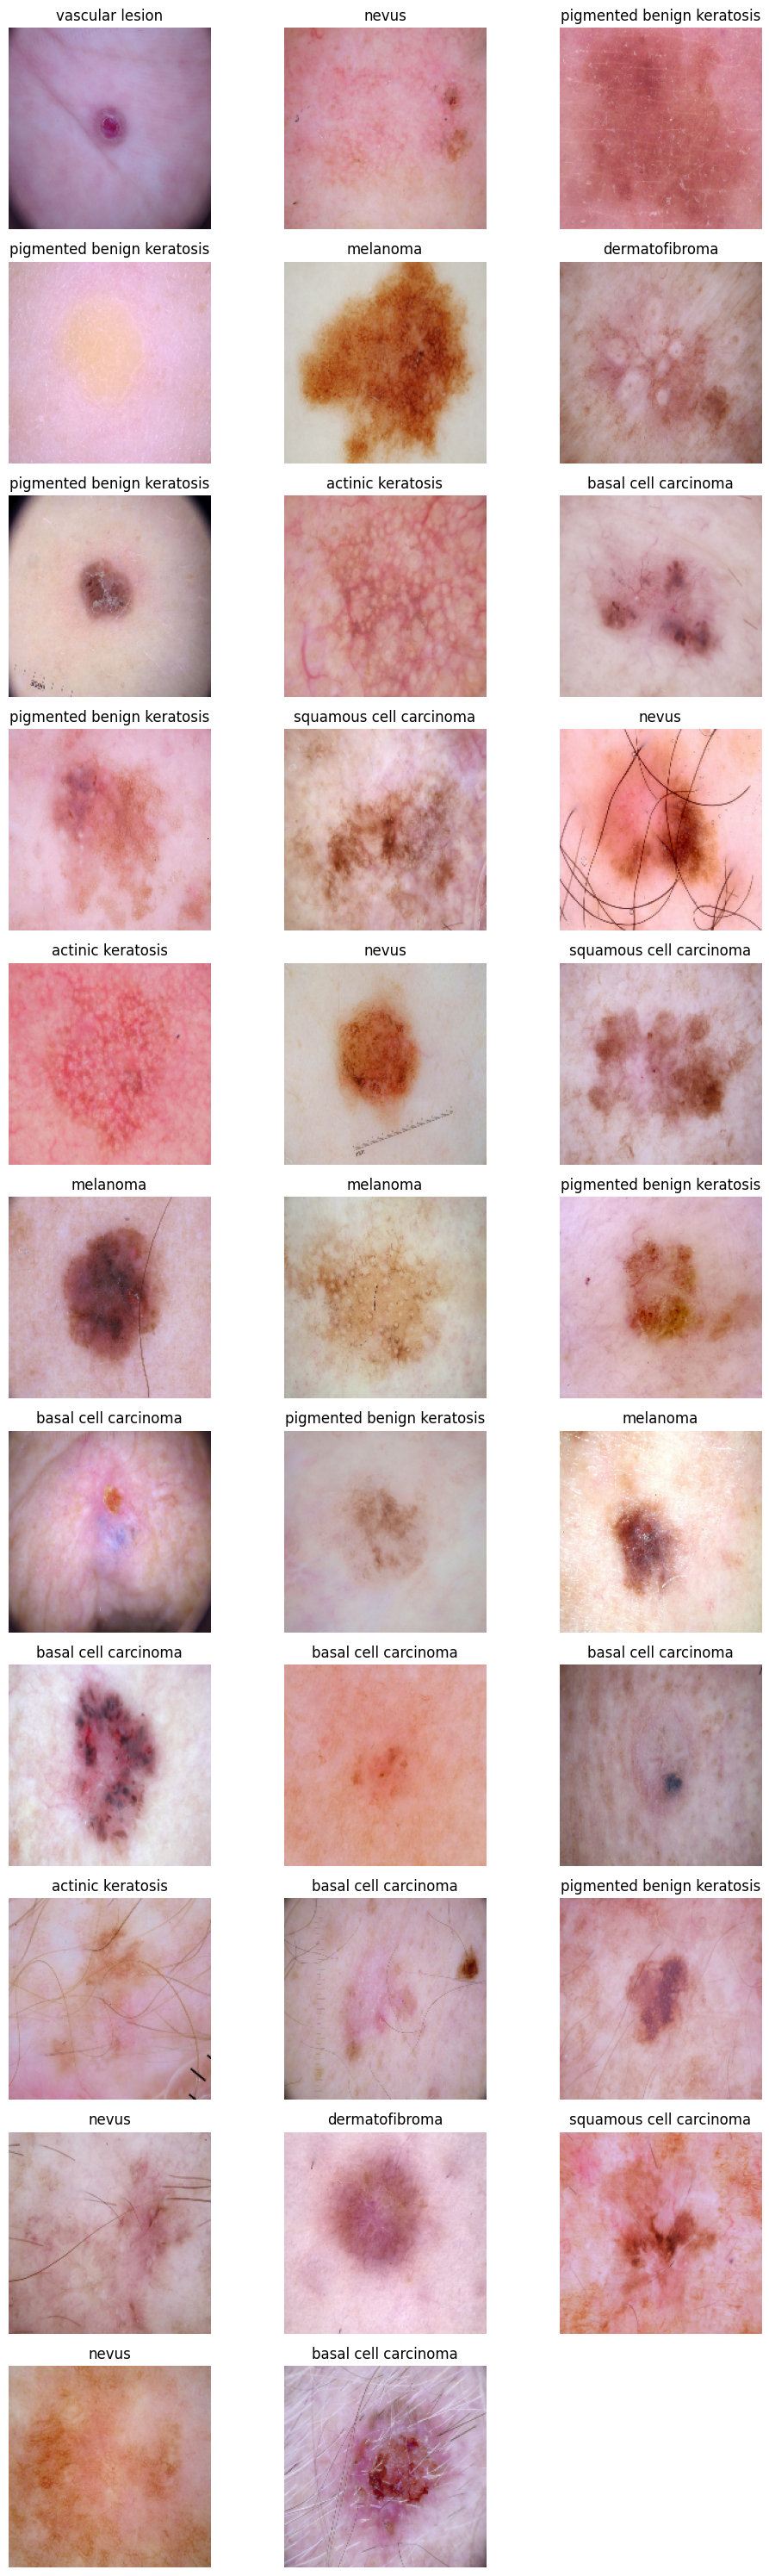

In [116]:
### your code goes here, you can use training or validation data to visualize

for image_batch, labels_batch in train_ds.take(1):
  print("Image_batch.shape :",image_batch.shape)
  print("label_batch.shape :",labels_batch.shape)



  plt_rows = image_batch.shape[0]//3+1
  plt_cols = 3

  plt.figure(figsize=(10, 30))

  for i in range(image_batch.shape[0]):
    ax = plt.subplot(plt_rows, plt_cols, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[np.argmax(labels_batch[i])])
    plt.axis("off")
plt.tight_layout()
plt.show()

### Model Building & training : First


*   Create a CNN model, which can accurately detect 9 classes present in the dataset. While building the model, rescale images to normalize pixel values between (0,1).

*   Choose an appropriate optimiser and loss function for model training

*   Train the model for ~20 epochs

*   Write your findings after the model fit. You must check if there is any evidence of model overfit or underfit.


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [117]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

*italicized text*### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [118]:
## Hyperparameters
learning_rate = 0.001
input_shape = (img_height, img_width, 3)
init_weight = 'normal'    # Initial weight for initializations
activation_func = 'relu'

optimizer = 'adam'
loss_fn = "categorical_crossentropy"

In [119]:
### Your code goes here
### CNN Model creation
model = Sequential()
### Rescale images to normalize pixel values between (0,1).

model.add(layers.Rescaling(1./255, input_shape=input_shape))

# Two Convolution layers with 32 channels with kernel size 3 X 3 and one max pool of kernal size 2 X 2
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPool2D(pool_size=(2, 2)))

# One convolution layer with 64 channels with kernal 3 X 3,
# Batch normalization
# Max pool of size 2 X 2
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

# One convolution layer with 128 channels with kernal 3 X 3,
# Batch normalization
# Max pool of size 2 X 2
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

# Flatten the output
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(9))
model.add(Activation('sigmoid'))

## Number of classes is 9
model.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_7 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 176, 176, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 88, 88, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 86, 86, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 86, 86, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 41, 41, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 512)                 │      26,214,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 9)                   │           4,617 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 9)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,322,793 (100.41 MB)

 Trainable params: 26,322,409 (100.41 MB)

 Non-trainable params: 384 (1.50 KB)

##### Optimizer for the model
Choose an appropirate optimiser and loss function for model training

In [120]:
### choose an appropirate optimiser and loss function
model.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'])

In [121]:
# View the summary of all layers
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_7 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 176, 176, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 88, 88, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 86, 86, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 86, 86, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 41, 41, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 512)                 │      26,214,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 9)                   │           4,617 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 9)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,322,793 (100.41 MB)

 Trainable params: 26,322,409 (100.41 MB)

 Non-trainable params: 384 (1.50 KB)

### Train the model

In [122]:
# Selected 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 28s 133ms/step - accuracy: 0.2028 - loss: 26.4975 - val_accuracy: 0.1544 - val_loss: 7.2006
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.3042 - loss: 9.7609 - val_accuracy: 0.1119 - val_loss: 2.7686
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.3257 - loss: 3.5675 - val_accuracy: 0.1208 - val_loss: 2.6342
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.3782 - loss: 2.1865 - val_accuracy: 0.2461 - val_loss: 3.1409
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.3927 - loss: 1.9773 - val_accuracy: 0.1633 - val_loss: 3.4998
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.4141 - loss: 1.7414 - val_accuracy: 0.2573 - val_loss: 3.8010
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.4559 - loss: 1.5527 - val_accuracy: 0.3221 - val_loss: 6.4485
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.4608 - loss: 1.6260 - val_accuracy: 0.2528 

##### Visualizing training results

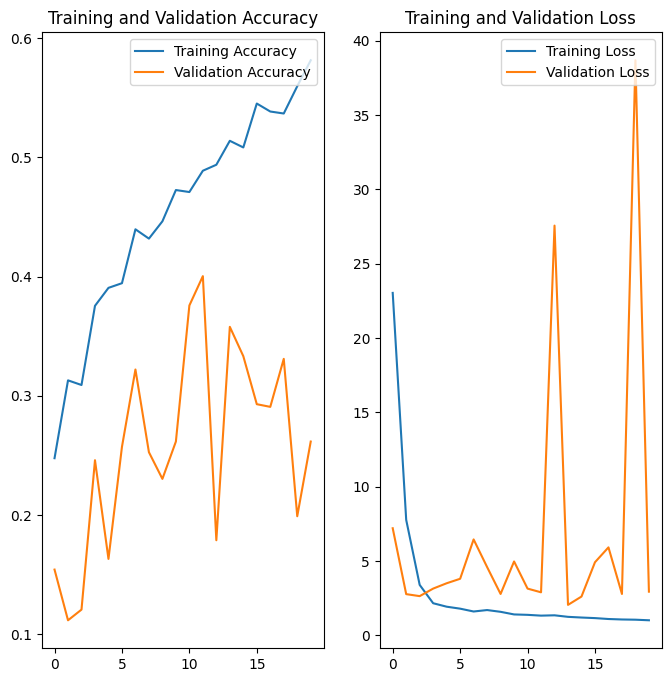

In [123]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Write your findings after the model fit, see if there is an evidence of model overfit or underfit

#### Above model shows signs of **Overfitting** and **Instability**
###### **Training Accuracy** : Training accuracy is increasing gradually from 20% to 65% , which means model is getting trained
##### **Training loss** : Training loss is decreasing however intially it is above 27 which is very high. This is indicator of a problem of model architecture, data preprocessing, or loss function.
##### **Validation Accuracy** : Validation accuracy is flucuating and keeping very low in range of 9-32%, this means that model is not generalizing and memorizing the training data.This means model is **overfitting**.
##### **Validation Loss** : Validation loss is extremly flucuating also very high which means model is **instable**

As per above class chart , it is evident that there is a **Class Imbalance**, 5 class has less than 200 data points while others have around 400 data images, we need to **Augument Image** to sort the class imbalance issue

### Data Augumentation:

Using **ImageDataGenerator** for data augumentation.

*   It's doesn't add new images to dataset permanently.It generates transformed images in each epoch during training.

*  It creates variations of your existing images by applying random transformations like rotations, shifts, zooms, flips, and more

*  Transformations are applied on-the-fly during training, saving memory and processing time.

**Key Parameters:**

**rotation_range**: Rotates images by a random angle within the specified range.

**width_shift_range**: Shifts images horizontally by a random fraction.

**height_shift_range**: Shifts images vertically by a random fraction.

**rescale**: Rescales pixel values to a range between 0 and 1.

**shear_range**: Applies a shearing transformation to images.

**zoom_range**: Zooms into or out of images randomly.

**horizontal_flip**: Flips images horizontally.

**fill_mode**: Specifies how to fill in newly created pixels after transformations (e.g., 'nearest', 'constant', 'reflect', 'wrap').




In [124]:
# Real time data augumentation

datagen = ImageDataGenerator(
        featurewise_center=False,               # set input mean to 0 over the dataset
        samplewise_center=False,                # set each sample mean to 0
        featurewise_std_normalization=False,    # divide inputs by std of the dataset
        samplewise_std_normalization=False,     # divide each input by its std
        zca_whitening=False,                    # apply ZCA whitening
        rotation_range=20,                      # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2,                       # Randomly zoom image
        width_shift_range=0.2,                  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,                 # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,                   # randomly flip images
        vertical_flip=False)                     # randomly flip images

print(class_names)

train_batches = datagen.flow_from_directory(data_dir_train,
    target_size = (img_height,img_width),
    classes = class_names,
    batch_size = batch_size
 )

valid_batches = datagen.flow_from_directory(data_dir_test,
    target_size = (img_height,img_width),
    classes = class_names,
    batch_size = batch_size
)


['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
Found 2239 images belonging to 9 classes.
Found 118 images belonging to 9 classes.


#####Visulization of augumented data

Image_batch.shape : (32, 180, 180, 3)
label_batch.shape : (32, 9)


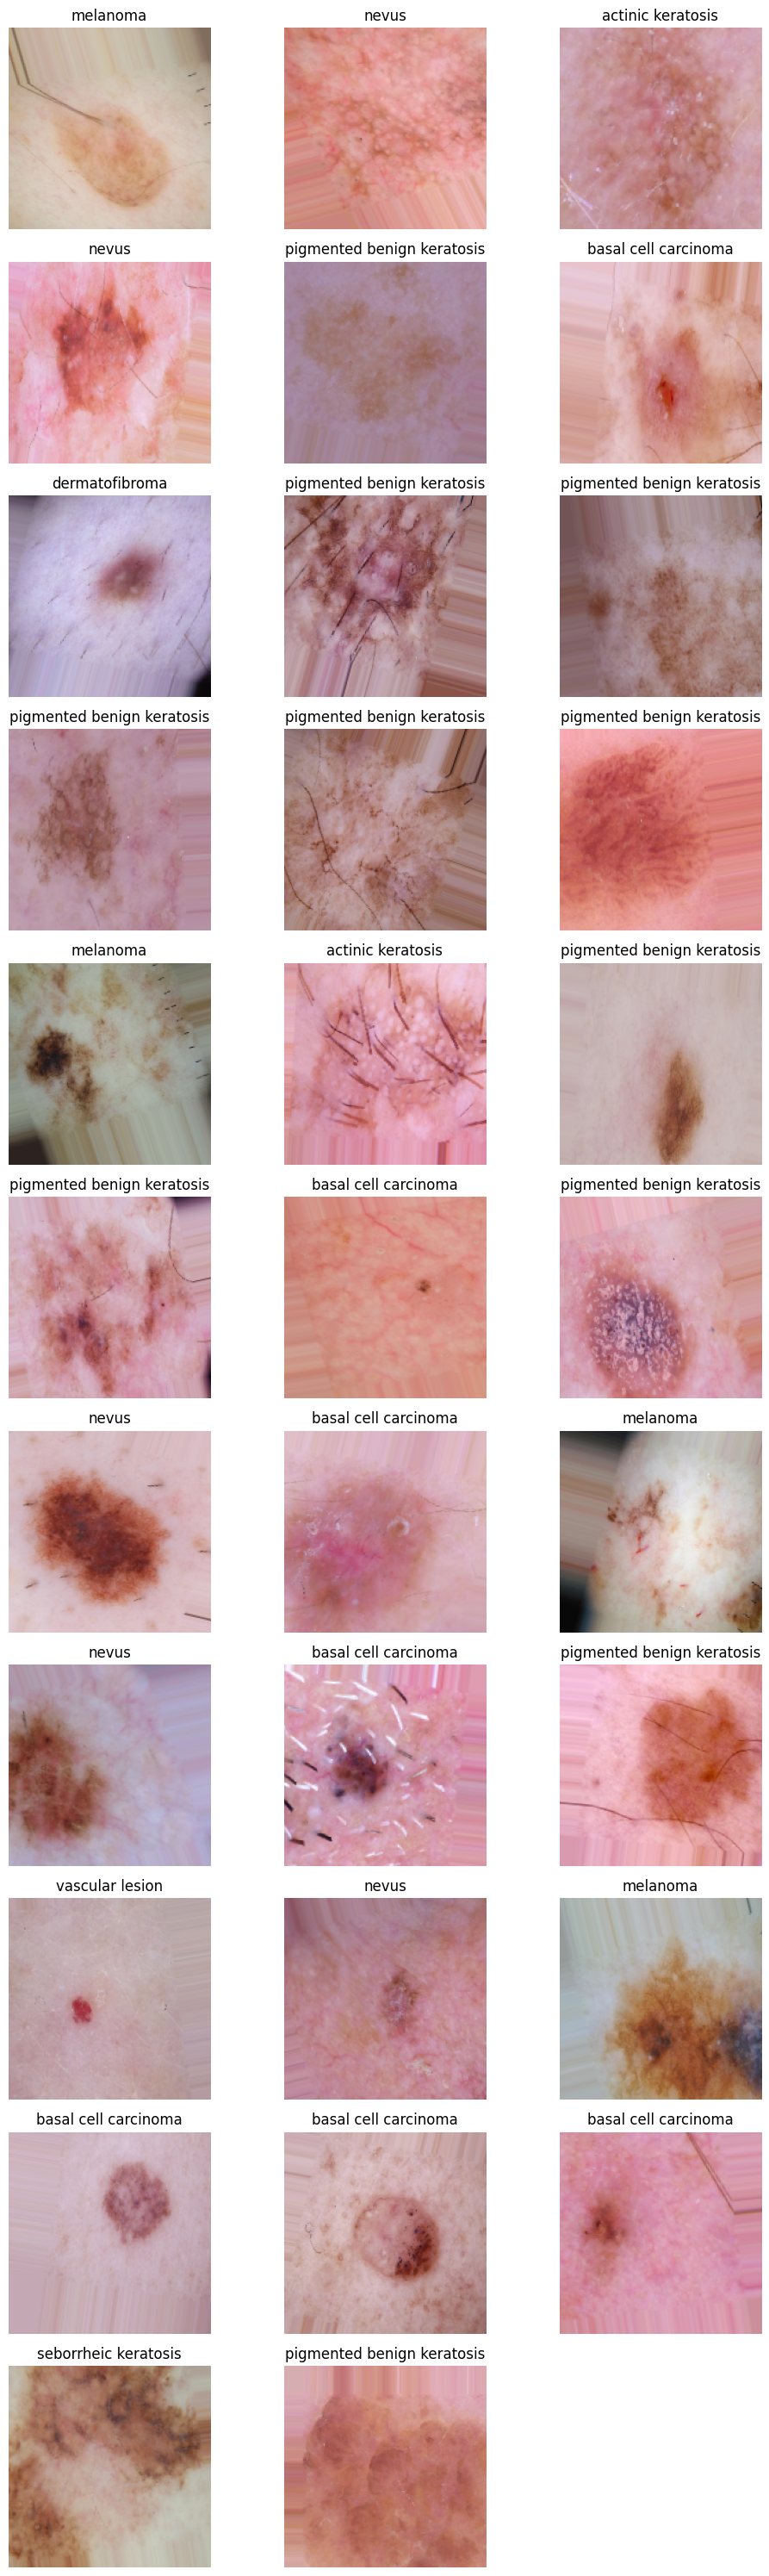

In [125]:
# visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
image_batch, labels_batch = next(train_batches)

print("Image_batch.shape :",image_batch.shape)
print("label_batch.shape :",labels_batch.shape)

plt_rows = image_batch.shape[0]//3+1
plt_cols = 3

plt.figure(figsize=(10, 30))

for i in range(image_batch.shape[0]):
    ax = plt.subplot(plt_rows, plt_cols, i + 1)
    plt.imshow(image_batch[i].astype("uint8"))
    plt.title(class_names[np.argmax(labels_batch[i])])
    plt.axis("off")
plt.tight_layout()
plt.show()

### Model Building & training on the augmented data : 2nd Model


*   Create a CNN model, which can accurately detect 9 classes present in the dataset. While building the model rescale images to normalize pixel values between (0,1).

*   Choose an appropriate optimiser and loss function for model training

*   Train the model for ~20 epochs

*   Write your findings after the model fit, see if the earlier issue is resolved or not?



In [126]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
model_1 = Sequential()

### Rescale images to normalize pixel values between (0,1).
model_1.add(layers.Rescaling(1./255, input_shape=input_shape))

# Increse the model size by adding another 32 layer
model_1.add(Conv2D(32, kernel_size=(3, 3), activation=activation_func, padding='same', input_shape=input_shape))
model_1.add(Conv2D(32, kernel_size=(3, 3), activation=activation_func, padding='same'))
# Max Pool size of 2*2
model_1.add(MaxPool2D(pool_size=(2, 2)))
# Adding Dropout Layer
model_1.add(Dropout(0.25))

model_1.add(Conv2D(64, kernel_size=(3, 3), activation=activation_func, padding = 'Same'))
model_1.add(Conv2D(64, kernel_size=(3, 3), activation=activation_func, padding = 'Same'))
model_1.add(MaxPool2D(pool_size=(2, 2)))
model_1.add(Dropout(0.4))

model_1.add(Conv2D(128, kernel_size=(3, 3), activation=activation_func))
model_1.add(MaxPool2D(pool_size=(2, 2)))
model_1.add(Dropout(0.4))

model_1.add(Flatten())

model_1.add(Dense(512, activation=activation_func))
model_1.add(Dropout(0.5))
model_1.add(Dense(9, activation='softmax'))

model_1.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_8 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 180, 180, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 90, 90, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_40 (Conv2D)                   │ (None, 90, 90, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ (None, 43, 43, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 21, 21, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 21, 21, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 56448)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 512)                 │      28,901,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 9)                   │           4,617 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,045,929 (110.80 MB)

 Trainable params: 29,045,929 (110.80 MB)

 Non-trainable params: 0 (0.00 B)

##### Compiling the model
Choose an appropriate optimiser and loss function for model training

In [127]:
## Your code goes here
model_1.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

##### Training the model with 20 epoches

In [128]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
    patience=2,
    verbose=1,
    factor=0.5,
    min_lr=0.00001)

In [129]:
## Your code goes here, note: train your model for 20 epochs
history_1 = model_1.fit(
  train_batches,
  validation_data=valid_batches,
  epochs=epochs,
  callbacks=[learning_rate_reduction]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 63s 820ms/step - accuracy: 0.1919 - loss: 2.6253 - val_accuracy: 0.1356 - val_loss: 2.1819 - learning_rate: 0.0010
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 52s 736ms/step - accuracy: 0.2093 - loss: 2.0348 - val_accuracy: 0.1525 - val_loss: 2.1692 - learning_rate: 0.0010
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 50s 713ms/step - accuracy: 0.2720 - loss: 1.9999 - val_accuracy: 0.2203 - val_loss: 2.1879 - learning_rate: 0.0010
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 50s 719ms/step - accuracy: 0.2943 - loss: 1.8451 - val_accuracy: 0.2203 - val_loss: 2.1105 - learning_rate: 0.0010
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 53s 760ms/step - accuracy: 0.3551 - loss: 1.7198 - val_accuracy: 0.2288 - val_loss: 2.0919 - learning_rate: 0.0010
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 55s 785ms/step - accuracy: 0.3682 - loss: 1.7203 - val_accuracy: 0.2627 - val_loss: 2.0268 - learning_rate: 0.0010
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 50s 722ms/step - accuracy: 0.3924 - loss: 1.

### Visualizing the results

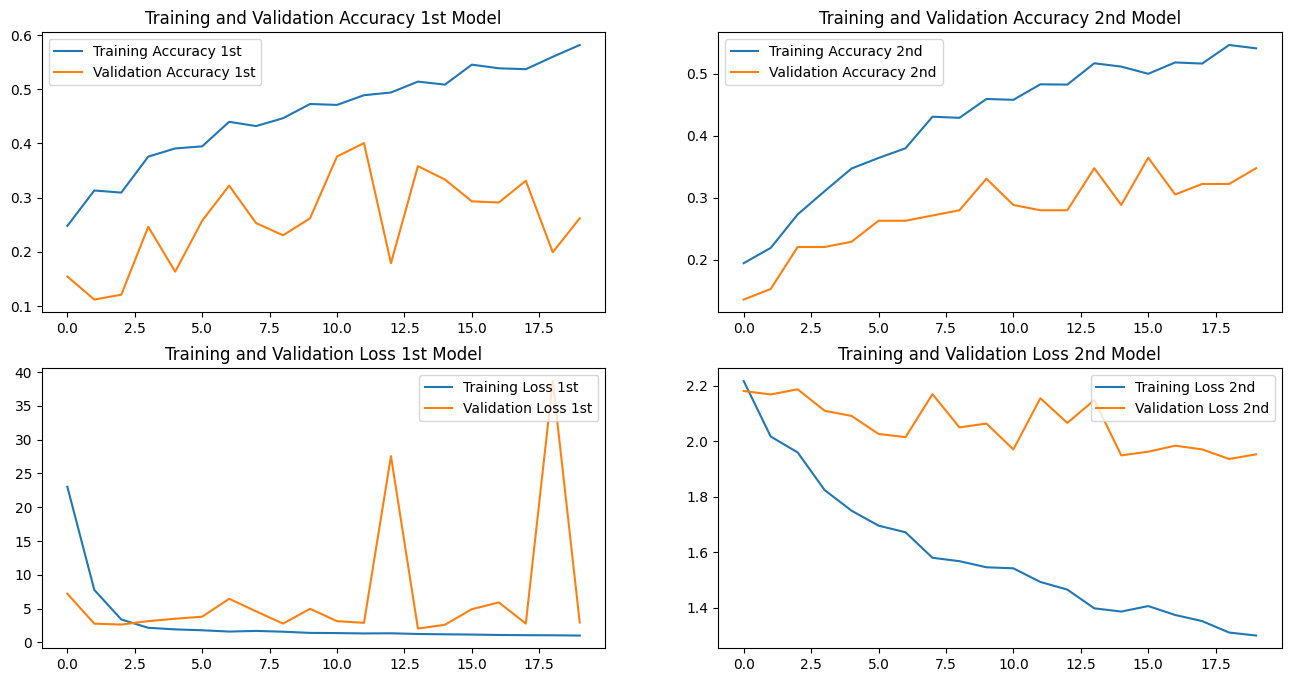

In [130]:
acc_1 = history_1.history['accuracy']
val_acc_1 = history_1.history['val_accuracy']

loss_1 = history_1.history['loss']
val_loss_1 = history_1.history['val_loss']

epochs_range = range(epochs)

fig,ax = plt.subplots(2,2,figsize=(16,8))

ax[0,0].plot(epochs_range, acc, label='Training Accuracy 1st')
ax[0,0].plot(epochs_range, val_acc, label='Validation Accuracy 1st')
ax[0,0].legend(loc='upper left')
ax[0,0].set_title('Training and Validation Accuracy 1st Model')


ax[0,1].plot(epochs_range, acc_1, label='Training Accuracy 2nd')
ax[0,1].plot(epochs_range, val_acc_1, label='Validation Accuracy 2nd')
ax[0,1].legend(loc='upper left')
ax[0,1].set_title('Training and Validation Accuracy 2nd Model')


ax[1,0].plot(epochs_range, loss, label='Training Loss 1st')
ax[1,0].plot(epochs_range, val_loss, label='Validation Loss 1st')
ax[1,0].legend(loc='upper right')
ax[1,0].set_title('Training and Validation Loss 1st Model')

ax[1,1].plot(epochs_range, loss_1, label='Training Loss 2nd')
ax[1,1].plot(epochs_range, val_loss_1, label='Validation Loss 2nd')
ax[1,1].legend(loc='upper right')
ax[1,1].set_title('Training and Validation Loss 2nd Model')

plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

### Above 2nd model still shows **Overfitting** and **Instability**

#####**Training accuracy**: is increasing between 15% to 43%
#####**Test accuracy**    : is better and shows less variation still unstable.
#####**Training loss**    : has imporved with epochs which is a good sign
#####**Test loss**.       : almost flat means model is not generalized

Model 2 is better than Model 1 still it needs to be solved for overfitting and instatbility. Less data and class imbalance is major reason


###**Class distribution**: Examine the current class distribution in the training dataset

##### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.



*    Which class has the least number of samples?
*   Which classes dominate the data in terms of the proportionate number of samples?



 The details of directory and files in Train
There are 9 directories and 0 images in 'Train'.
There are 0 directories and 114 images in 'actinic keratosis'.
There are 0 directories and 376 images in 'basal cell carcinoma'.
There are 0 directories and 95 images in 'dermatofibroma'.
There are 0 directories and 438 images in 'melanoma'.
There are 0 directories and 357 images in 'nevus'.
There are 0 directories and 462 images in 'pigmented benign keratosis'.
There are 0 directories and 77 images in 'seborrheic keratosis'.
There are 0 directories and 181 images in 'squamous cell carcinoma'.
There are 0 directories and 139 images in 'vascular lesion'.
 
 The details of directory and files in Test
There are 9 directories and 0 images in 'Test'.
There are 0 directories and 16 images in 'actinic keratosis'.
There are 0 directories and 16 images in 'basal cell carcinoma'.
There are 0 directories and 16 images in 'dermatofibroma'.
There are 0 directories and 16 images in 'melanoma'.
There are 0 d

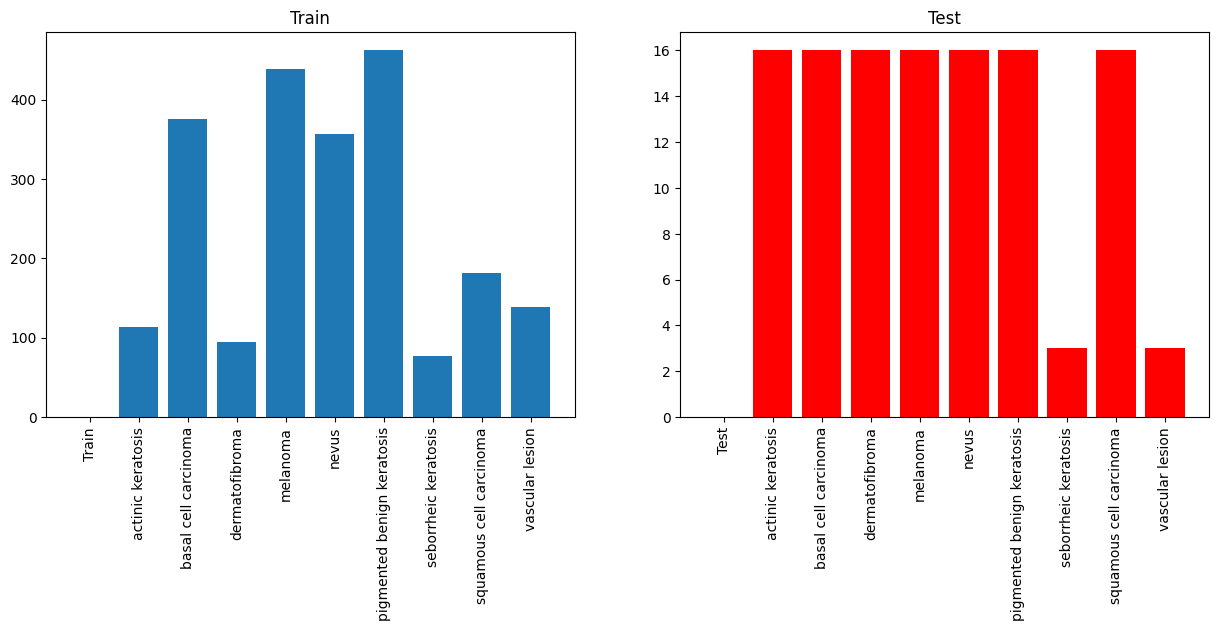

In [131]:
## Your code goes here.
# Count number of files in each directories of train and test

print(" The details of directory and files in Train")
image_train_y = []
class_train_x = []
for dirpath, dirnames, filenames in os.walk(data_dir_train):
  image_train_y.append(len(filenames))
  class_train_x.append(os.path.basename(dirpath))
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{os.path.basename(dirpath)}'.")

image_test_y = []
class_test_x = []
print(" \n The details of directory and files in Test")
for dirpath, dirnames, filenames in os.walk(data_dir_test):
  image_test_y.append(len(filenames))
  class_test_x.append(os.path.basename(dirpath))
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{os.path.basename(dirpath)}'.")

fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].bar(class_train_x,image_train_y)
ax[0].tick_params(axis='x', rotation=90)
ax[0].set_title("Train")

ax[1].bar(class_test_x,image_test_y, color ='red')
ax[1].tick_params(axis='x', rotation=90)
ax[1].set_title("Test")
plt.show()


#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
##### Actinic Keratosis has less number of samples
#### - Which classes dominate the data in terms proportionate number of samples?
##### Melanoma and Pigmented benign Keratosis has higher dominance also 5 class has less than 50% data from remaining 4 classes


####**Handling class imbalances**: Rectify class imbalances present in the training dataset with Augmentor library.

#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [132]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [133]:
path_to_training_dataset="/content/drive/MyDrive/Data-For-Analysis/melanoma_CNN/ISIC_data/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/Data-For-Analysis/melanoma_CNN/ISIC_data/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7AB3985EC3D0>: 100%|██████████| 500/500 [00:26<00:00, 19.10 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/Data-For-Analysis/melanoma_CNN/ISIC_data/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7AB4291AE490>: 100%|██████████| 500/500 [00:18<00:00, 27.58 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/Data-For-Analysis/melanoma_CNN/ISIC_data/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7AB3C1B65CD0>: 100%|██████████| 500/500 [00:19<00:00, 25.37 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/Data-For-Analysis/melanoma_CNN/ISIC_data/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=3872x2592 at 0x7AB4291F2850>: 100%|██████████| 500/500 [01:22<00:00,  6.05 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/Data-For-Analysis/melanoma_CNN/ISIC_data/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7AB3C1A4AF90>: 100%|██████████| 500/500 [01:10<00:00,  7.05 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/Data-For-Analysis/melanoma_CNN/ISIC_data/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7AB4665E3CD0>: 100%|██████████| 500/500 [00:19<00:00, 25.82 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/Data-For-Analysis/melanoma_CNN/ISIC_data/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7AB3C1BB2450>: 100%|██████████| 500/500 [00:41<00:00, 12.09 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/Data-For-Analysis/melanoma_CNN/ISIC_data/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7AB3C02F3690>: 100%|██████████| 500/500 [00:17<00:00, 28.75 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/Data-For-Analysis/melanoma_CNN/ISIC_data/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7AB398555D90>: 100%|██████████| 500/500 [00:20<00:00, 24.24 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [134]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [135]:
path_list_new = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

In [136]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

In [137]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [138]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = df2

In [139]:
new_df['Label'].value_counts()

Label
actinic keratosis             500
basal cell carcinoma          500
dermatofibroma                500
melanoma                      500
nevus                         500
pigmented benign keratosis    500
seborrheic keratosis          500
squamous cell carcinoma       500
vascular lesion               500
Name: count, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [140]:
batch_size = 32
img_height = 180
img_width = 180

####**Model Building & training on the rectified class imbalance data**: 3rd Model with physical data augumentation



*   Create a CNN model, which can accurately detect 9 classes present in the dataset. While building the model, rescale images to normalize pixel values between (0,1).
*   Choose an appropriate optimiser and loss function for model training
*   Train the model for ~30 epochs
*   Write your findings after the model fit, see if the issues are resolved or not?




#####Train Set

In [141]:

data_dir_train = pathlib.Path("/content/drive/MyDrive/Data-For-Analysis/melanoma_CNN/ISIC_data/Train")

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size,
  labels='inferred',
  label_mode='categorical'
  )

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#####validation dataset

In [142]:

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size,
  labels='inferred',
  label_mode='categorical'
  )

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [143]:
print("Batch size:", batch_size)
print("Number of classes:", len(train_ds.class_names))  # Check the number of classes
print("Number of filenames:", len(train_ds.file_paths)) # Check the number of files Keras sees.
print("Number of batches:", len(list(train_ds)))

Batch size: 32
Number of classes: 9
Number of filenames: 5392
Number of batches: 169


In [144]:
# Example: Print the number of files in each class (adapt as needed)

for class_name in train_ds.class_names:
    class_dir = os.path.join(data_dir_train, class_name)  # Replace with your data directory

    num_files = len([f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))])
    print(f"Class {class_name}: {num_files} files")

Class actinic keratosis: 114 files
Class basal cell carcinoma: 376 files
Class dermatofibroma: 95 files
Class melanoma: 438 files
Class nevus: 357 files
Class pigmented benign keratosis: 462 files
Class seborrheic keratosis: 77 files
Class squamous cell carcinoma: 181 files
Class vascular lesion: 139 files


In [145]:
# Check the output directory for each class:
Total_img = 0
for class_name in class_names:
  class_dir = os.path.join(data_dir_train, class_name)
  output_dir = os.path.join(data_dir_train, class_name, "output")
  original_img = len(glob.glob(os.path.join(class_dir, "*.jpg")))
  aug_images = len(glob.glob(os.path.join(output_dir, "*.jpg")))
  print(f"Number of images in {class_name}: {original_img}")
  print(f"Number of images in {class_name}/output: {aug_images}")
  Total_img += original_img + aug_images

print(f"Total images in train dataset: {Total_img}")



Number of images in actinic keratosis: 114
Number of images in actinic keratosis/output: 500
Number of images in basal cell carcinoma: 376
Number of images in basal cell carcinoma/output: 500
Number of images in dermatofibroma: 95
Number of images in dermatofibroma/output: 500
Number of images in melanoma: 438
Number of images in melanoma/output: 500
Number of images in nevus: 357
Number of images in nevus/output: 500
Number of images in pigmented benign keratosis: 462
Number of images in pigmented benign keratosis/output: 500
Number of images in seborrheic keratosis: 77
Number of images in seborrheic keratosis/output: 500
Number of images in squamous cell carcinoma: 181
Number of images in squamous cell carcinoma/output: 500
Number of images in vascular lesion: 139
Number of images in vascular lesion/output: 500
Total images in train dataset: 6739


In [146]:
# Verify input shape:
for image_batch, labels_batch in train_ds.take(1):
    print("Image batch shape:", image_batch.shape)
    print("Labels batch shape:", labels_batch.shape)
    break  # Check only the first batch

Image batch shape: (32, 180, 180, 3)
Labels batch shape: (32, 9)


##### model (make sure to include normalization)

In [147]:
## your code goes here
model_3 = Sequential()

### Rescale images to normalize pixel values between (0,1).
model_3.add(layers.Rescaling(1./255, input_shape=input_shape))

# Increse the model size by adding another 32 layer
model_3.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=input_shape))
model_3.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))

# Max Pool size of 2*2
model_3.add(MaxPool2D(pool_size=(2, 2)))
model_3.add(BatchNormalization())
# Adding Dropout Layer
model_3.add(Dropout(0.25))

model_3.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model_3.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model_3.add(MaxPool2D(pool_size=(2, 2)))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.4))

model_3.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model_3.add(BatchNormalization())
model_3.add(MaxPool2D(pool_size=(2, 2)))
model_3.add(Dropout(0.4))

model_3.add(Flatten())

model_3.add(Dense(128, activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.5))
model_3.add(Dense(9, activation='softmax'))

model_3.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_9 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_42 (Conv2D)                   │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_43 (Conv2D)                   │ (None, 180, 180, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 90, 90, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_44 (Conv2D)                   │ (None, 90, 90, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_45 (Conv2D)                   │ (None, 90, 90, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 45, 45, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_46 (Conv2D)                   │ (None, 43, 43, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 43, 43, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 21, 21, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 21, 21, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 56448)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │       7,225,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 7,367,465 (28.10 MB)

 Trainable params: 7,366,761 (28.10 MB)

 Non-trainable params: 704 (2.75 KB)

##### Compile your model (Choose optimizer and loss function appropriately)

In [148]:
## your code goes here
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

model_3.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

#####Train model

In [149]:
epochs = 30

## Your code goes here, use 50 epochs.
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
    patience=3,
    verbose=1,
    factor=0.5,
    min_lr=0.00001)

history_3 = model_3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[learning_rate_reduction]
)

Epoch 1/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 56s 280ms/step - accuracy: 0.3037 - loss: 2.2844 - val_accuracy: 0.0676 - val_loss: 10.6345 - learning_rate: 0.0010
Epoch 2/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 41s 243ms/step - accuracy: 0.4454 - loss: 1.6142 - val_accuracy: 0.2049 - val_loss: 3.5538 - learning_rate: 0.0010
Epoch 3/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 39s 229ms/step - accuracy: 0.4744 - loss: 1.4653 - val_accuracy: 0.1618 - val_loss: 5.1403 - learning_rate: 0.0010
Epoch 4/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 41s 243ms/step - accuracy: 0.5176 - loss: 1.3242 - val_accuracy: 0.5583 - val_loss: 1.2359 - learning_rate: 0.0010
Epoch 5/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 83s 249ms/step - accuracy: 0.5714 - loss: 1.1868 - val_accuracy: 0.6154 - val_loss: 1.0912 - learning_rate: 0.0010
Epoch 6/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 38s 225ms/step - accuracy: 0.5897 - loss: 1.1214 - val_accuracy: 0.4039 - val_loss: 1.8600 - learning_rate: 0.0010
Epoch 7/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 44s 243ms/step - accuracy: 0.

#####Visualize the model results

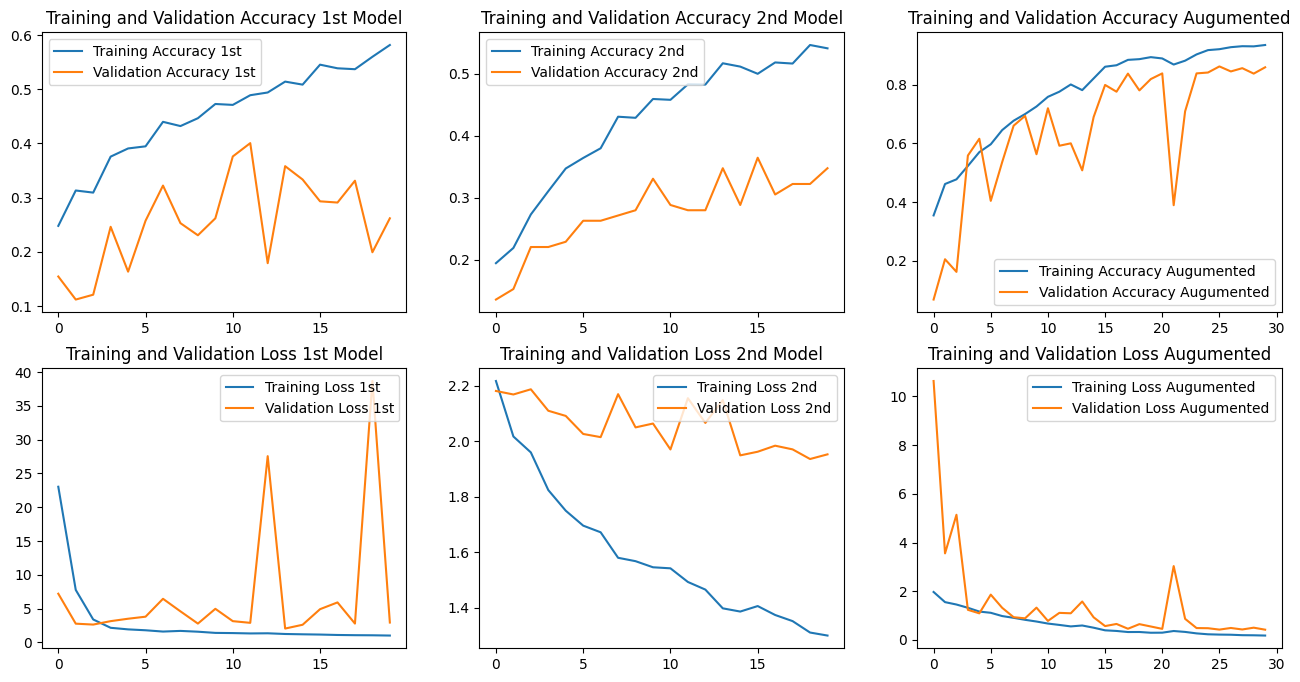

In [150]:
acc_3 = history_3.history['accuracy']
val_acc_3 = history_3.history['val_accuracy']

loss_3 = history_3.history['loss']
val_loss_3 = history_3.history['val_loss']

epochs_range_20 = range(20)
epochs_range = range(epochs)

fig,ax = plt.subplots(2,3,figsize=(16,8))

ax[0,0].plot(epochs_range_20, acc, label='Training Accuracy 1st')
ax[0,0].plot(epochs_range_20, val_acc, label='Validation Accuracy 1st')
ax[0,0].legend(loc='upper left')
ax[0,0].set_title('Training and Validation Accuracy 1st Model')


ax[0,1].plot(epochs_range_20, acc_1, label='Training Accuracy 2nd')
ax[0,1].plot(epochs_range_20, val_acc_1, label='Validation Accuracy 2nd')
ax[0,1].legend(loc='upper left')
ax[0,1].set_title('Training and Validation Accuracy 2nd Model')

ax[0,2].plot(epochs_range, acc_3, label='Training Accuracy Augumented')
ax[0,2].plot(epochs_range, val_acc_3, label='Validation Accuracy Augumented')
ax[0,2].legend(loc='lower right')
ax[0,2].set_title('Training and Validation Accuracy Augumented')


ax[1,0].plot(epochs_range_20, loss, label='Training Loss 1st')
ax[1,0].plot(epochs_range_20, val_loss, label='Validation Loss 1st')
ax[1,0].legend(loc='upper right')
ax[1,0].set_title('Training and Validation Loss 1st Model')

ax[1,1].plot(epochs_range_20, loss_1, label='Training Loss 2nd')
ax[1,1].plot(epochs_range_20, val_loss_1, label='Validation Loss 2nd')
ax[1,1].legend(loc='upper right')
ax[1,1].set_title('Training and Validation Loss 2nd Model')

ax[1,2].plot(epochs_range, loss_3, label='Training Loss Augumented')
ax[1,2].plot(epochs_range, val_loss_3, label='Validation Loss Augumented')
ax[1,2].legend(loc='upper right')
ax[1,2].set_title('Training and Validation Loss Augumented')

plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



###**Overall Trend** :



*   **Overfitting/Instability Early On**: The initial high validation loss and fluctuations suggest the model might have been overfitting the training data or experiencing some instability in the early epochs.
*   **Positive Impact of Learning Rate Reduction**: The learning rate reductions appear to have helped the model find a better set of weights, leading to significant performance improvements.
*   **Good Final Performance**: The model achieves reasonably good performance by epoch 30, with high training and validation accuracy. However, more epochs might lead to further improvement.


#### Deleting the augumented image created for rerun

Uncomment

shutil.rmtree(output_subfolder_path)  # Force delete using shutil.rmtree

force_delete_output_subfolders(root_directory) # To delete output subfolder

In [151]:
import shutil

def force_delete_output_subfolders(root_dir, subfolder_name="output"):
    """
    Forcefully deletes a specific subfolder (e.g., "output") within multiple
    folders under a given root directory.

    Args:
        root_dir: The path to the root directory containing the folders.
        subfolder_name: The name of the subfolder to delete (default: "output").
    """

    for folder_name in os.listdir(root_dir):  # Iterate through folders in root
        folder_path = os.path.join(root_dir, folder_name)

        if os.path.isdir(folder_path):  # Make sure it's a directory
            output_subfolder_path = os.path.join(folder_path, subfolder_name)

            if os.path.exists(output_subfolder_path):  # Check if subfolder exists
                try:
                    #shutil.rmtree(output_subfolder_path)  # Force delete using shutil.rmtree
                    print(f"Deleted subfolder '{subfolder_name}' in '{folder_path}'")
                except Exception as e:
                    print(f"Error deleting subfolder '{subfolder_name}' in '{folder_path}': {e}")
            else:
                print(f"Subfolder '{subfolder_name}' not found in '{folder_path}'")
        else:
          print(f"Skipping file: {folder_path}") # Print if it is a file

In [152]:
root_directory = "/content/drive/MyDrive/Data-For-Analysis/melanoma_CNN/ISIC_data/Train"  # Example

# 3. Call the function:
#force_delete_output_subfolders(root_directory) # To delete output subfolder

Deleted subfolder 'output' in '/content/drive/MyDrive/Data-For-Analysis/melanoma_CNN/ISIC_data/Train/actinic keratosis'
Deleted subfolder 'output' in '/content/drive/MyDrive/Data-For-Analysis/melanoma_CNN/ISIC_data/Train/basal cell carcinoma'
Deleted subfolder 'output' in '/content/drive/MyDrive/Data-For-Analysis/melanoma_CNN/ISIC_data/Train/dermatofibroma'
Deleted subfolder 'output' in '/content/drive/MyDrive/Data-For-Analysis/melanoma_CNN/ISIC_data/Train/melanoma'
Deleted subfolder 'output' in '/content/drive/MyDrive/Data-For-Analysis/melanoma_CNN/ISIC_data/Train/nevus'
Deleted subfolder 'output' in '/content/drive/MyDrive/Data-For-Analysis/melanoma_CNN/ISIC_data/Train/pigmented benign keratosis'
Deleted subfolder 'output' in '/content/drive/MyDrive/Data-For-Analysis/melanoma_CNN/ISIC_data/Train/seborrheic keratosis'
Deleted subfolder 'output' in '/content/drive/MyDrive/Data-For-Analysis/melanoma_CNN/ISIC_data/Train/squamous cell carcinoma'
Deleted subfolder 'output' in '/content/dri